<a href="https://colab.research.google.com/github/gitmystuff/DTSC5502/blob/main/Module_12-Trees/Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trees

Name

## Getting Started

* Colab - get notebook from our repository
* Save a Copy in Drive
* Remove Copy of
* Edit your name
* Submit shared link in Canvas


## Decision Trees

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

https://en.wikipedia.org/wiki/Decision_tree

                                      Chillin with some grillin?
                                         Is it cloudy today?
                                            (Root Node)
                                                /\
                                           yes /  \ no
                                              /    \
                                         chance    grillin
                                        of rain?      
                                            /\
                                       yes /  \ no
                                          /    \
                                  no grillin     grillin
                                   

### Decision Tree Terms

* Root Node: Represents our population from which two or more subsets are divided up
* Decision Node: Sub-nodes divided into more sub-nodes based on a decision
* Splitting: dividing a node into sub-nodes
* Leaf / Terminal Node: Node with no children or sub-nodes
* Branch: A section of a decision tree
* Pruning: Eliminating branches and nodes
* Parent / Children: The relationship between nodes and their sub-nodes


## Grillin

See Grillin Notebook

## The Split

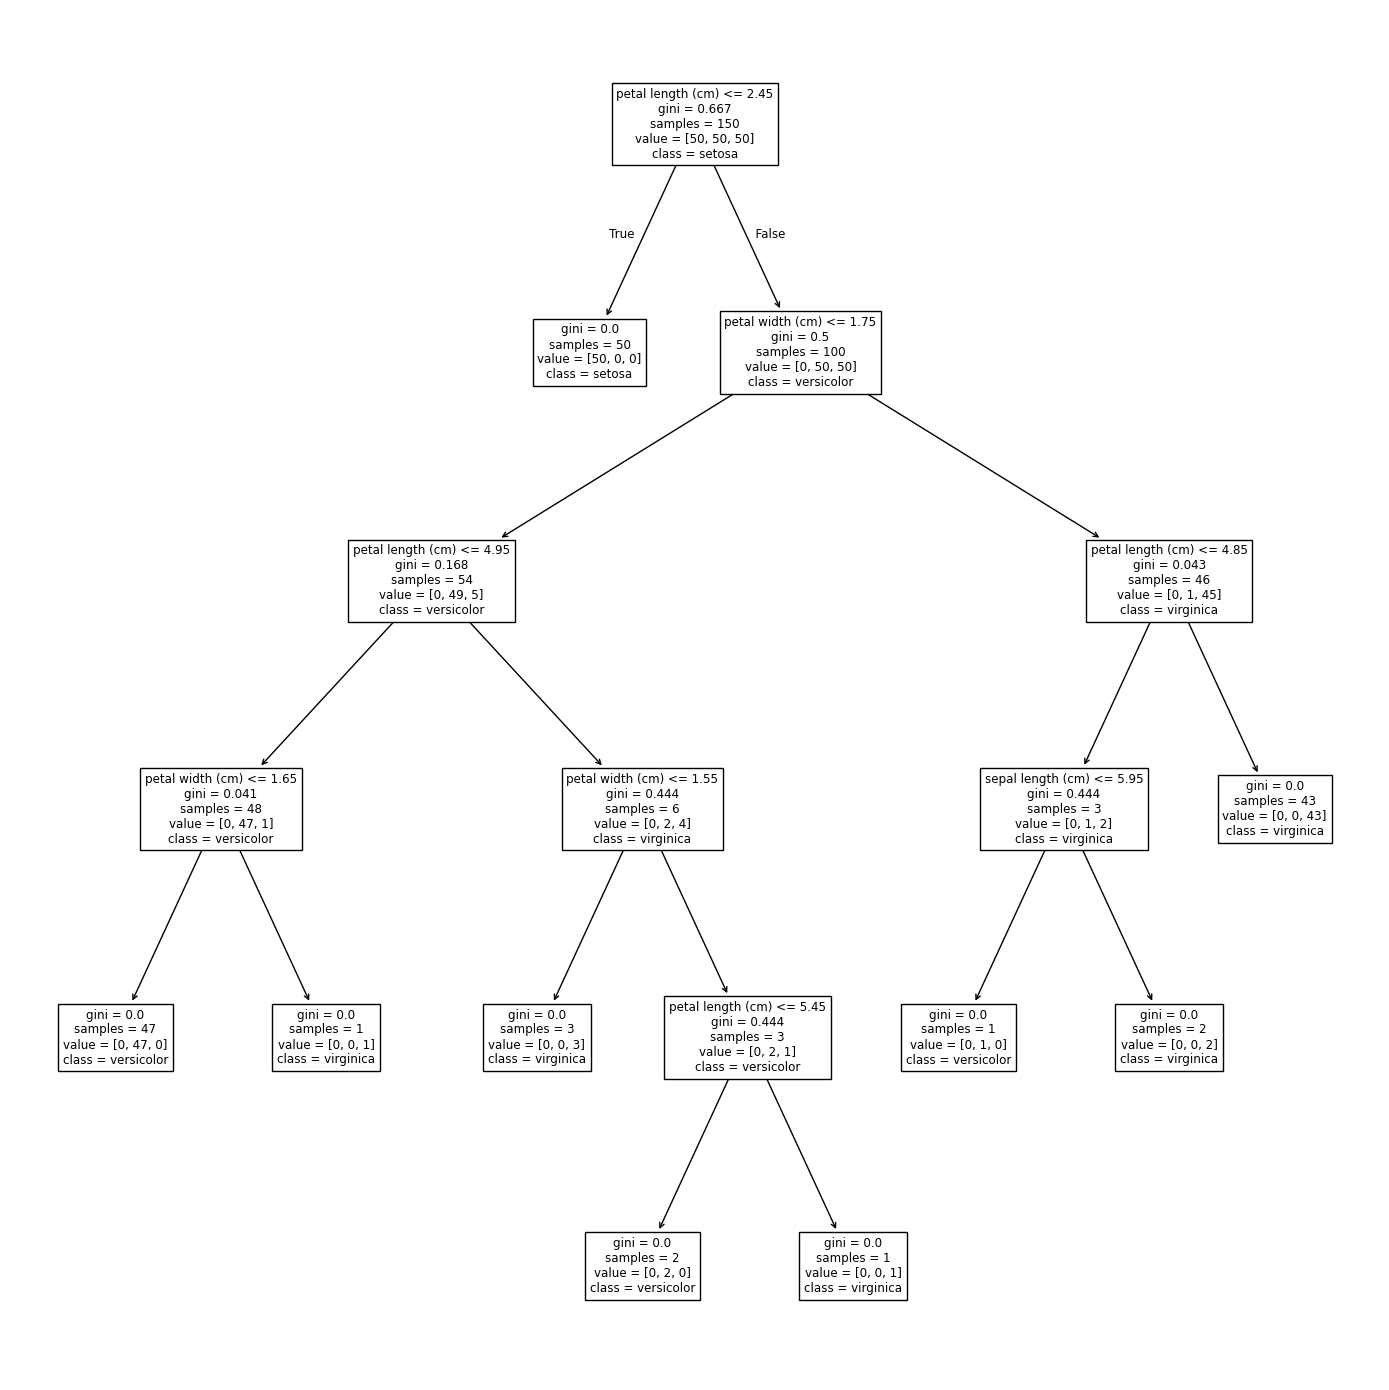

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

iris = load_iris()
X = iris.data
y = iris.target

model = DecisionTreeClassifier(criterion='gini', random_state=42).fit(X, y)

plt.figure(figsize=(14, 14))
tree.plot_tree(model,
              feature_names=iris.feature_names,
              class_names=['setosa', 'versicolor', 'virginica'],
              filled=False)

plt.tight_layout();

### Splitting Criteria

Tree-based methods (such as CART, Random Forests, and Gradient Boosted Trees) grow decision trees by repeatedly splitting the data into purer subsets. A *splitting criterion* evaluates how good a candidate split is.

---

### Gini Impurity

**Definition**
Gini measures how often a randomly chosen sample would be misclassified if labeled according to the class distribution of a node.

$
\text{Gini} = 1 - \sum_{k=1}^K p_k^2
$

**Properties**

* Lower Gini = purer node.
* CART (Classification and Regression Trees) uses Gini by default.
* Computationally efficient and often yields similar splits to entropy.

---

### Entropy

**Definition**
Entropy comes from information theory; it measures uncertainty or disorder in the node.

$
\text{Entropy} = - \sum_{k=1}^K p_k \log_2(p_k)
$

**Properties**

* Zero when node is pure.
* Penalizes impurity more heavily than Gini near balanced splits.
* Used in ID3 and C4.5 decision tree algorithms.

---

### Information Gain

**Definition**
Information Gain measures how much a split reduces impurity (usually entropy).

$
\text{Information Gain} = H(\text{parent}) - \sum_{i} \frac{n_i}{n} H(\text{child}_i)
$

Where (H) is entropy.

**Interpretation**

* Higher Information Gain = better split.
* Encourages splits that create homogeneous child nodes.

---

### When to Use Each

* **Gini Impurity**

  * Fast to compute; default in CART and Random Forests.
  * Often similar results to entropy with less computation.

* **Entropy + Information Gain**

  * More theoretically grounded in information theory.
  * Slightly stronger preference for balanced, informative splits.
  * Used in ID3/C4.5 family of algorithms.



### Gini

#### Definition and Calculation

* **Gini Impurity** measures the probability that a **randomly chosen element** from a set (a node in a tree) would be **incorrectly classified** if it were randomly labeled according to the class distribution within that set.
* The **Gini Index** is calculated as: $G = 1 - \sum_{i=1}^{C} (p_i)^2$, where $C$ is the number of classes, and $p_i$ is the fractional representation (probability) of class $i$ at that node.


#### Key Properties

* **Diversity and Impurity:** The **more diverse** or mixed the class distribution in a node, the **higher the Gini Impurity** index. This means a less pure node has a higher Gini value.
* **Maximum Purity (Gini = 0):** A **Gini Impurity of 0** signifies **maximum purity** of classification. This occurs when all elements in the node belong to the **same single class** ($p_i = 1$ for one class).
* **Maximum Impurity:** The Gini value never reaches 1. The maximum Gini Impurity occurs when classes are **perfectly balanced** (equal distribution).
    * For a **binary classification problem** (2 classes), the maximum Gini is $\mathbf{0.5}$ (when $p_1=0.5$ and $p_2=0.5$).
    * For $C$ classes, the maximum value is $1 - 1/C$.
* **Implementation:** Gini Impurity is generally considered **easy to implement** and is computationally fast because it avoids complex calculations like logarithms (which are used in Entropy). It often leads to the algorithm favoring splits that result in the creation of very pure nodes.


### Entropy

#### Definition and Calculation

* **Entropy** is a measure of the **uncertainty** or **disorder** (impurity) in a dataset or a specific node. Higher entropy means higher disorder and less information.
* **Counting Unique Labels:** You **don't simply count** the number of unique labels to find entropy. Instead, you calculate the **proportion** of each unique label.
* **Entropy Formula:** The calculation is correct:
    $$E = - \sum_{i=1}^{C} p_i \log_2(p_i)$$
    where $C$ is the number of classes, and $p_i$ is the probability (proportion) of elements belonging to class $i$. The logarithm is typically base 2.


#### Key Properties of Proportions ($p_i$)

* **Maximum Certainty ($p_i = 1$):** If $p_i = 1$ for a specific class $i$, it means **all members** in the set belong to that property (the node is perfectly pure).
* **Zero Contribution ($p_i = 0$):** If $p_i = 0$ for a specific class $i$, it means **no members** belong to that property. Mathematically, $0 \log_2(0)$ is treated as $\mathbf{0}$ in the entropy calculation, meaning that class contributes nothing to the total disorder.

#### Entropy Values (For a Two-Class Problem)

For a two-class problem where $p$ is the proportion of Class 1 and $q$ is the proportion of Class 2 (so $q = 1 - p$):

* **Maximum Purity (Entropy = 0):** When one class is **completely dominant** ($p=1, q=0$ or $p=0, q=1$), the set has **minimal disorder** (it is **pure**), and the **Entropy is zero**.
* **Maximum Disorder (Entropy = 1):** When the set is **perfectly balanced** ($q = p = 0.5$), it has the **maximum disorder** (least pure), and the **Entropy is $\mathbf{1}$**.
* **Dominance and Purity:** When $q=1$, the other class, entropy goes back to zero since $q=1$ implies $p=0$, which is a state of maximum purity.

In summary, **Entropy ranges from 0 (pure) to 1 (maximum disorder/equal split) for a binary classification problem**.

https://book.akij.net/eBooks/2018/May/5aef50939a868/Data_Science_for_Bus.pdf (page 51 - 52)

### Entropy Formula

### $-\sum{p(x)log_2p(x)}$

### Information Gain

$IG(Y,X) = Entropy{(Y)}-Entropy{(Y|X)}$

How much information is gained about y when given X.

* where Y = Target (inflated)
* and Y|X is class of Y given the feature

We can define information gain as a measure of how much information a feature provides about a class. Information gain helps to determine the order of attributes in the nodes of a decision tree.

Information Gain = 1 - Entropy

* Measures how much information X provides for y
* Binary measure, either 1 or 0
* 1 for full bit of information
* 0 for no information
* Entropy is also information

We can also think of entropy as information. Suppose we have a loaded six-sided die which always lands on (3). Each time we roll the die, we know upfront that the result will be (3). We gain no new information by rolling the die, so entropy is 0. On the other hand, if the die is fair and we roll a (3) there is a 1/6 chance in rolling the (3). Now we have gained information. Thus, rolling the die gives us one bit of information — which side the number landed on.

https://towardsdatascience.com/entropy-and-information-gain-in-decision-trees-c7db67a3a293

### Gain Ratio

* Makes decision on what to split first
* https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html
* Keep on splitting till our target value, inflated, is no longer mixed or pure
* We want splits that lower the entropy of our target column

See Information Gain Calculation Notebook

### Gini vs Entropy?

* https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html
* The Gini Impurity favours bigger partitions (distributions) and is simple to implement, whereas information gains favour smaller partitions (distributions) with a variety of diverse values, necessitating a data and splitting criterion experiment
* https://analyticsindiamag.com/gini-impurity-vs-information-gain-vs-chi-square-methods-for-decision-tree-split/
* Gini Index has values inside the interval (0, 0.5) whereas the interval of the Entropy is (0, 1). In the following figure, both of them are represented. The gini index has also been represented multiplied by two to see concretely the differences between them, which are not very significant.
* https://quantdare.com/decision-trees-gini-vs-entropy/

## Splitting Intuition with the Iris Dataset

(120, 4)
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
22                4.6               3.6                1.0               0.2
15                5.7               4.4                1.5               0.4
65                6.7               3.1                4.4               1.4
11                4.8               3.4                1.6               0.2
42                4.4               3.2                1.3               0.2


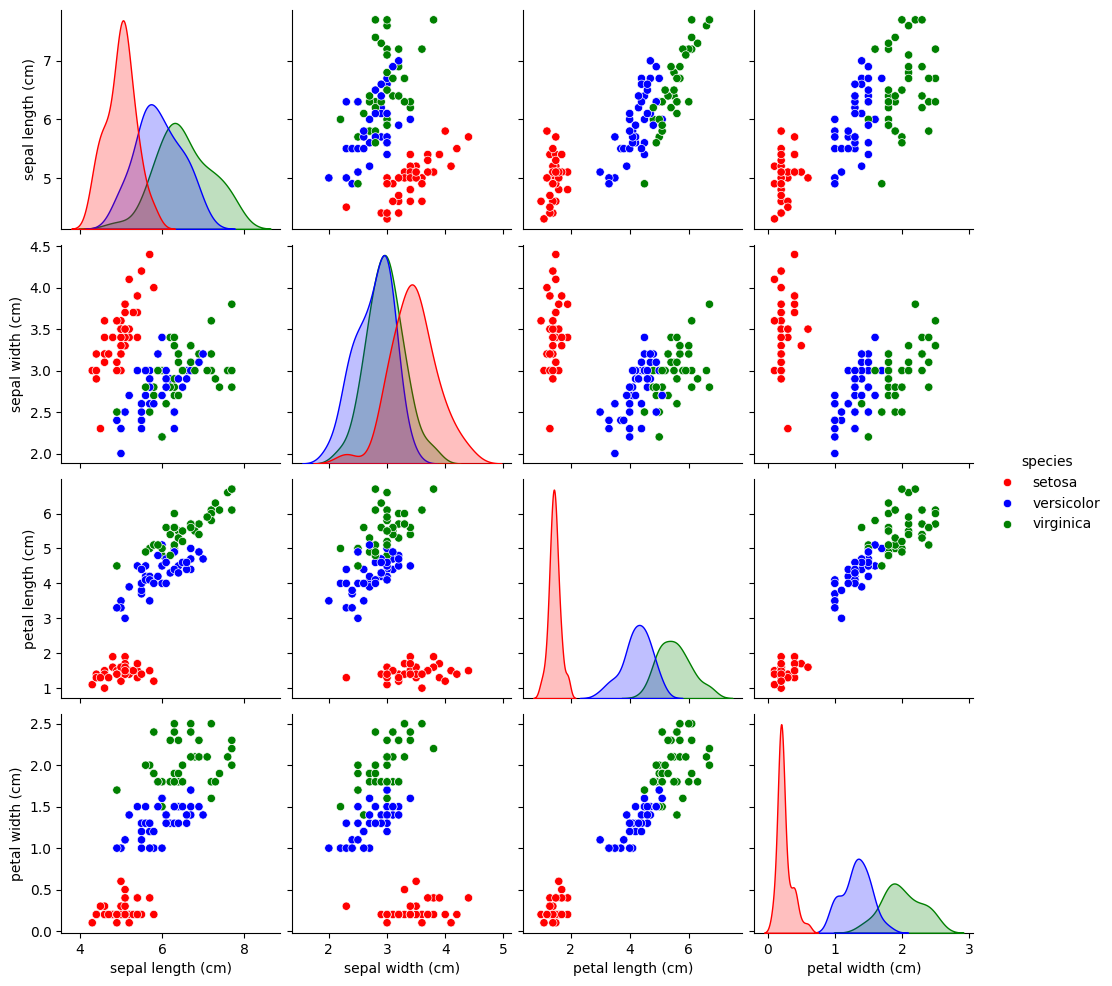

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(data=X, columns=iris.feature_names)
df['species'] = y
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})


X_train, X_test, y_train, y_test = train_test_split(df.drop('species', axis=1),
                                                    df['species'],
                                                    test_size=0.20,
                                                    random_state=42)

print(X_train.shape)
print(X_train.head())

example = X_train.copy()
example['species'] = y_train

sns.pairplot(example, hue='species', palette=['red', 'blue', 'green']);

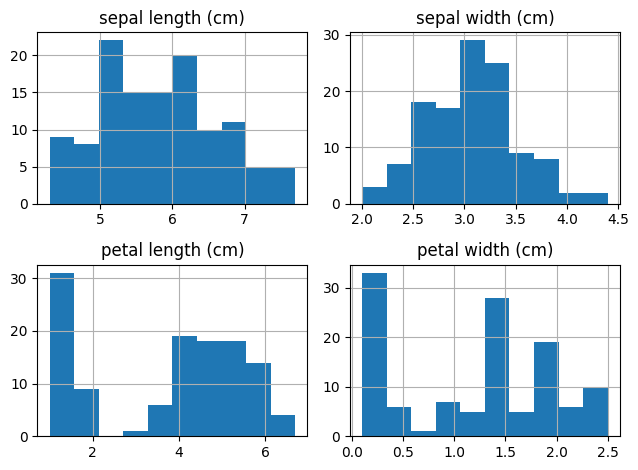

In [ ]:
import matplotlib.pyplot as plt

X_train.hist()
plt.tight_layout();

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
22                4.6               3.6                1.0               0.2
15                5.7               4.4                1.5               0.4
65                6.7               3.1                4.4               1.4
11                4.8               3.4                1.6               0.2
42                4.4               3.2                1.3               0.2


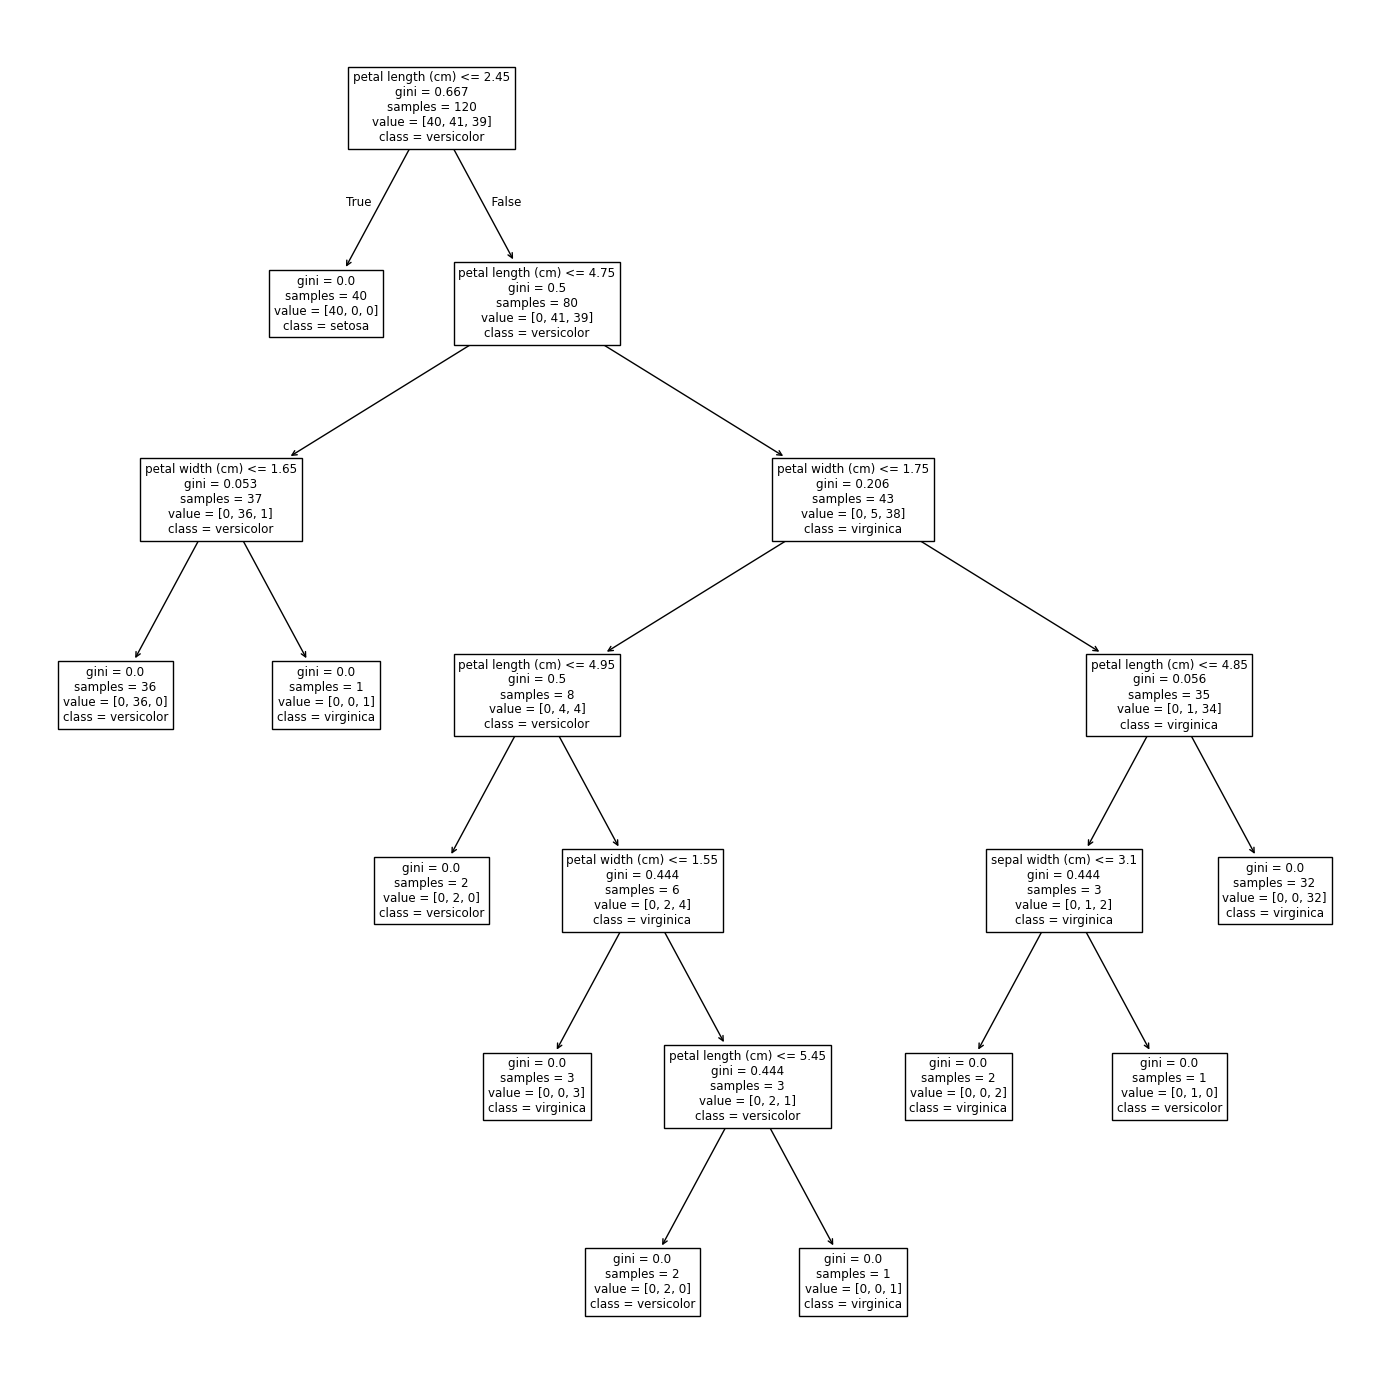

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

print(X_train.head())

model = DecisionTreeClassifier(criterion='gini', random_state=42).fit(X_train, y_train)

plt.figure(figsize=(14, 14))
tree.plot_tree(model,
              feature_names=X_train.columns,
              class_names=['setosa', 'versicolor', 'virginica'],
              filled=False)

plt.tight_layout();

Gini Formula

$
\text{Gini} = 1 - \sum_{k=1}^K p_k^2
$

In [ ]:
import numpy as np

# example gini score on petal length
print(y_train.value_counts(normalize=True))
1 - np.sum(np.square(y_train.value_counts(normalize=True)))

species
versicolor    0.341667
setosa        0.333333
virginica     0.325000
Name: proportion, dtype: float64


np.float64(0.6665277777777778)

### The Split

Our tree is built using **Gini impurity**, the default splitting criterion in CART.
Each node shows:

* The **feature and threshold** used to split
* The **Gini impurity** at that node
* The **number of samples**
* The **class counts** (value = [setosa, versicolor, virginica])
* The **predicted class**

#### 1. Root Node

```
petal length (cm) <= 2.45
gini = 0.667
samples = 120
value = [40, 41, 39]
class = versicolor
```

#### Why is Gini = 0.667?

The root contains an almost perfectly mixed set of 3 classes:

* 40 setosa
* 41 versicolor
* 39 virginica

Compute Gini:

[
G = 1 - (p_1^2 + p_2^2 + p_3^2)
]

With ($p_k = \frac{\text{count of class}}{120}$), these are each roughly (1/3).
Thus:

$
G \approx 1 - 3 \left(\frac{1}{3}\right)^2 = 1 - \frac{1}{3} = 0.6667
$

This is **maximum impurity for three classes**, because the classes are almost equally represented.

#### What the split does

The model chooses the feature/threshold that **most reduces Gini** after splitting.

---

#### 2. Left Child of Root (True branch)

```
gini = 0.0
samples = 40
value = [40, 0, 0]
class = setosa
```

#### Why is Gini = 0.0?

All 40 samples are setosa.

[
G = 1 - (1^2 + 0 + 0) = 0.
]

This is a **pure node**, so no further splits are needed.

This shows why petal length is a powerful feature: **all setosa have petal length ≤ 2.45 cm**.

---

#### 3. Right Child of Root (False branch)

```
petal length (cm) <= 4.75
gini = 0.5
samples = 80
value = [0, 41, 39]
class = versicolor
```

#### Why is Gini = 0.5?

Now the 80 samples consist only of:

* 41 versicolor
* 39 virginica

Two classes, almost perfectly balanced.

$
G = 1 - \left(\left(\frac{41}{80}\right)^2 + \left(\frac{39}{80}\right)^2\right)
\approx 1 - (0.262 + 0.238)
= 0.5
$

This node is **still fairly impure**, so the tree splits again.

---

#### 4. Left Child of the Middle Node

```
petal width (cm) <= 1.65
gini = 0.053
samples = 37
value = [0, 36, 1]
class = versicolor
```

#### Why is Gini = 0.053?

This node has almost all versicolor:

$
p_{\text{versicolor}} = \frac{36}{37}, \quad p_{\text{virginica}} = \frac{1}{37}
$

$
G = 1 - (0.973^{2} + 0.027^{2}) \approx 1 - (0.947 + 0.001) = 0.052
$

Very low impurity → nearly pure.

---

#### 5. Right Child of the Middle Node

```
petal width (cm) <= 1.75
gini = 0.206
samples = 43
value = [0, 5, 38]
class = virginica
```

#### Why is Gini = 0.206?

This node contains mostly virginica:

* 38 virginica
* 5 versicolor

$
p_{\text{virginica}} = \frac{38}{43}, \quad p_{\text{versicolor}} = \frac{5}{43}
$

$
G = 1 - (0.883^{2} + 0.116^{2})
\approx 1 - (0.78 + 0.01) = 0.206
$

Still some impurity, but the split greatly reduces uncertainty compared to the parent node (gini 0.5).

---

#### How Gini Relates to Choosing Splits

At each node, the algorithm:

1. Tries all candidate features & thresholds
2. Computes the weighted average Gini of the left + right children
3. Chooses the split that **maximally decreases impurity**

In our tree:

* The first split (petal length ≤ 2.45) immediately creates one pure node (setosa), so it gives the largest impurity reduction.
* The remaining classes (versicolor vs virginica) are separated mostly by petal width, creating nearly pure leaves.

This is why decision trees naturally “discover” the classic Iris pattern: **setosa is distinct on petal length; versicolor and virginica separate on petal width.**



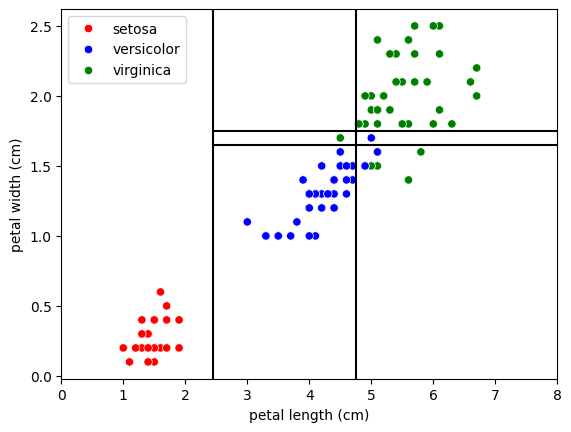

In [ ]:
# plot using hue to show different classes
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=example['petal length (cm)'],
                y=example['petal width (cm)'],
                hue=example['species'],
                palette=['red', 'blue', 'green'])
plt.axvline(x=2.45, color='black')
plt.axvline(x=4.75, color='black')
plt.hlines(y=1.65, xmin=2.45, xmax=8, color='black')
plt.hlines(y=1.75, xmin=2.45, xmax=8, color='black')

plt.xlim(0, 8)
plt.legend()
plt.show()

### The First Split - Why and How

Calculating Highest Information Gain

**Entropy Formula**

$-\sum{p(x)log_2p(x)}$

$IG(Y,X) = Entropy{(Y)}-Entropy{(Y|X)}$

How much information is gained about y, when we learn about y given X, a particular feature

* where Y = Target (inflated)
* and Y|X is class of Y given the feature

**Gini Impurity**

Gini Impurity = 1 - Gini

$
\text{Gini} = 1 - \sum_{k=1}^K p_k^2
$

In [ ]:
# https://www.featureranking.com/tutorials/machine-learning-tutorials/information-gain-computation/

def compute_impurity(feature, impurity_criterion):
    """
    This function calculates impurity of a feature.
    Supported impurity criteria: 'entropy', 'gini'
    input: feature (this needs to be a Pandas series)
    output: feature impurity
    """
    probs = feature.value_counts(normalize=True)

    if impurity_criterion == 'entropy':
        impurity = -1 * np.sum(np.log2(probs) * probs)
    elif impurity_criterion == 'gini':
        impurity = 1 - np.sum(np.square(probs))
    else:
        raise ValueError('Unknown impurity criterion')

    return(round(impurity, 3))

def comp_feature_information_gain(df, target, descriptive_feature, split_criterion):
    """
    This function calculates information gain for splitting on
    a particular descriptive feature for a given dataset
    and a given impurity criteria.
    Supported split criterion: 'entropy', 'gini'
    """

    print('target feature:', target)
    print('descriptive_feature:', descriptive_feature)
    print('split criterion:', split_criterion)

    target_entropy = compute_impurity(df[target], split_criterion)

    # we define two lists below:
    # entropy_list to store the entropy of each partition
    # weight_list to store the relative number of observations in each partition
    entropy_list = list()
    weight_list = list()

    # loop over each level of the descriptive feature
    # to partition the dataset with respect to that level
    # and compute the entropy and the weight of the level's partition
    for level in df[descriptive_feature].unique():
        df_feature_level = df[df[descriptive_feature] == level]
        entropy_level = compute_impurity(df_feature_level[target], split_criterion)
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(df_feature_level) / len(df)
        weight_list.append(round(weight_level, 3))

    # print('impurity of partitions:', entropy_list)
    # print('weights of partitions:', weight_list)

    feature_remaining_impurity = np.sum(np.array(entropy_list) * np.array(weight_list))
    # print('remaining impurity:', feature_remaining_impurity)

    information_gain = target_entropy - feature_remaining_impurity
    print('information gain:', information_gain)

    print('====================')

    return(information_gain)

In [ ]:
import numpy as np

split_criterion = 'entropy'
for feature in df.drop(columns='species').columns:
    feature_info_gain = comp_feature_information_gain(df, 'species', feature, split_criterion)

target feature: species
descriptive_feature: sepal length (cm)
split criterion: entropy
information gain: 0.8758720000000001
target feature: species
descriptive_feature: sepal width (cm)
split criterion: entropy
information gain: 0.517269
target feature: species
descriptive_feature: petal length (cm)
split criterion: entropy
information gain: 1.446396
target feature: species
descriptive_feature: petal width (cm)
split criterion: entropy
information gain: 1.436151


In [ ]:
split_criteria = 'gini'
for feature in df.drop(columns='species').columns:
    feature_info_gain = comp_feature_information_gain(df, 'species', feature, split_criteria)

target feature: species
descriptive_feature: sepal length (cm)
split criterion: gini
information gain: 0.347094
target feature: species
descriptive_feature: sepal width (cm)
split criterion: gini
information gain: 0.199623
target feature: species
descriptive_feature: petal length (cm)
split criterion: gini
information gain: 0.604321
target feature: species
descriptive_feature: petal width (cm)
split criterion: gini
information gain: 0.604288


## Random Forests

* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* https://www.analyticsvidhya.com/blog/2022/05/handling-missing-values-with-random-forest/

The way to build a good model is through data collection, data cleaning, feature selection, and feature engineering. After we have done all of this, it is then time to optimize our model's performance through its hyperparameters.

An ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees.

* https://en.wikipedia.org/wiki/Random_forest



### Ensemble Learning

In statistics and machine learning, **ensemble methods** use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.

https://en.wikipedia.org/wiki/Ensemble_learning

See Ensemble Learning Notebook

### Hyperparameters

A parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are derived via training.

https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)

* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/

Here are some default parameters:

<pre>
hyperparameters = {
            'n_estimators': 100,
            'criterion': 'gini',
            'max_depth': None,
            'max_leaf_nodes': None,
            'bootstrap': True
            }

model = RandomForestClassifier()
</pre>

**Parameters vs Hyperparameters**:
* Parameter: Usually estimated or learned from data
* Hyperparameter: Values that are tuned by the data scientist

The traditional way of performing hyperparameter optimization has been **grid search**, or a parameter sweep, which is simply an exhaustive searching through a manually specified subset of the hyperparameter space of a learning algorithm. A grid search algorithm must be guided by some performance metric, typically measured by cross-validation on the training set or evaluation on a held-out validation set.

https://en.wikipedia.org/wiki/Hyperparameter_optimization#Grid_search

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = load_iris()
X = data.data
y = data.target

iris = pd.DataFrame(data=X, columns=iris.feature_names)
iris['species'] = y
X_train, X_test, y_train, y_test = train_test_split(iris.drop('species', axis=1),
                                                    iris['species'],
                                                    test_size=0.20,
                                                    random_state=42)

1.0


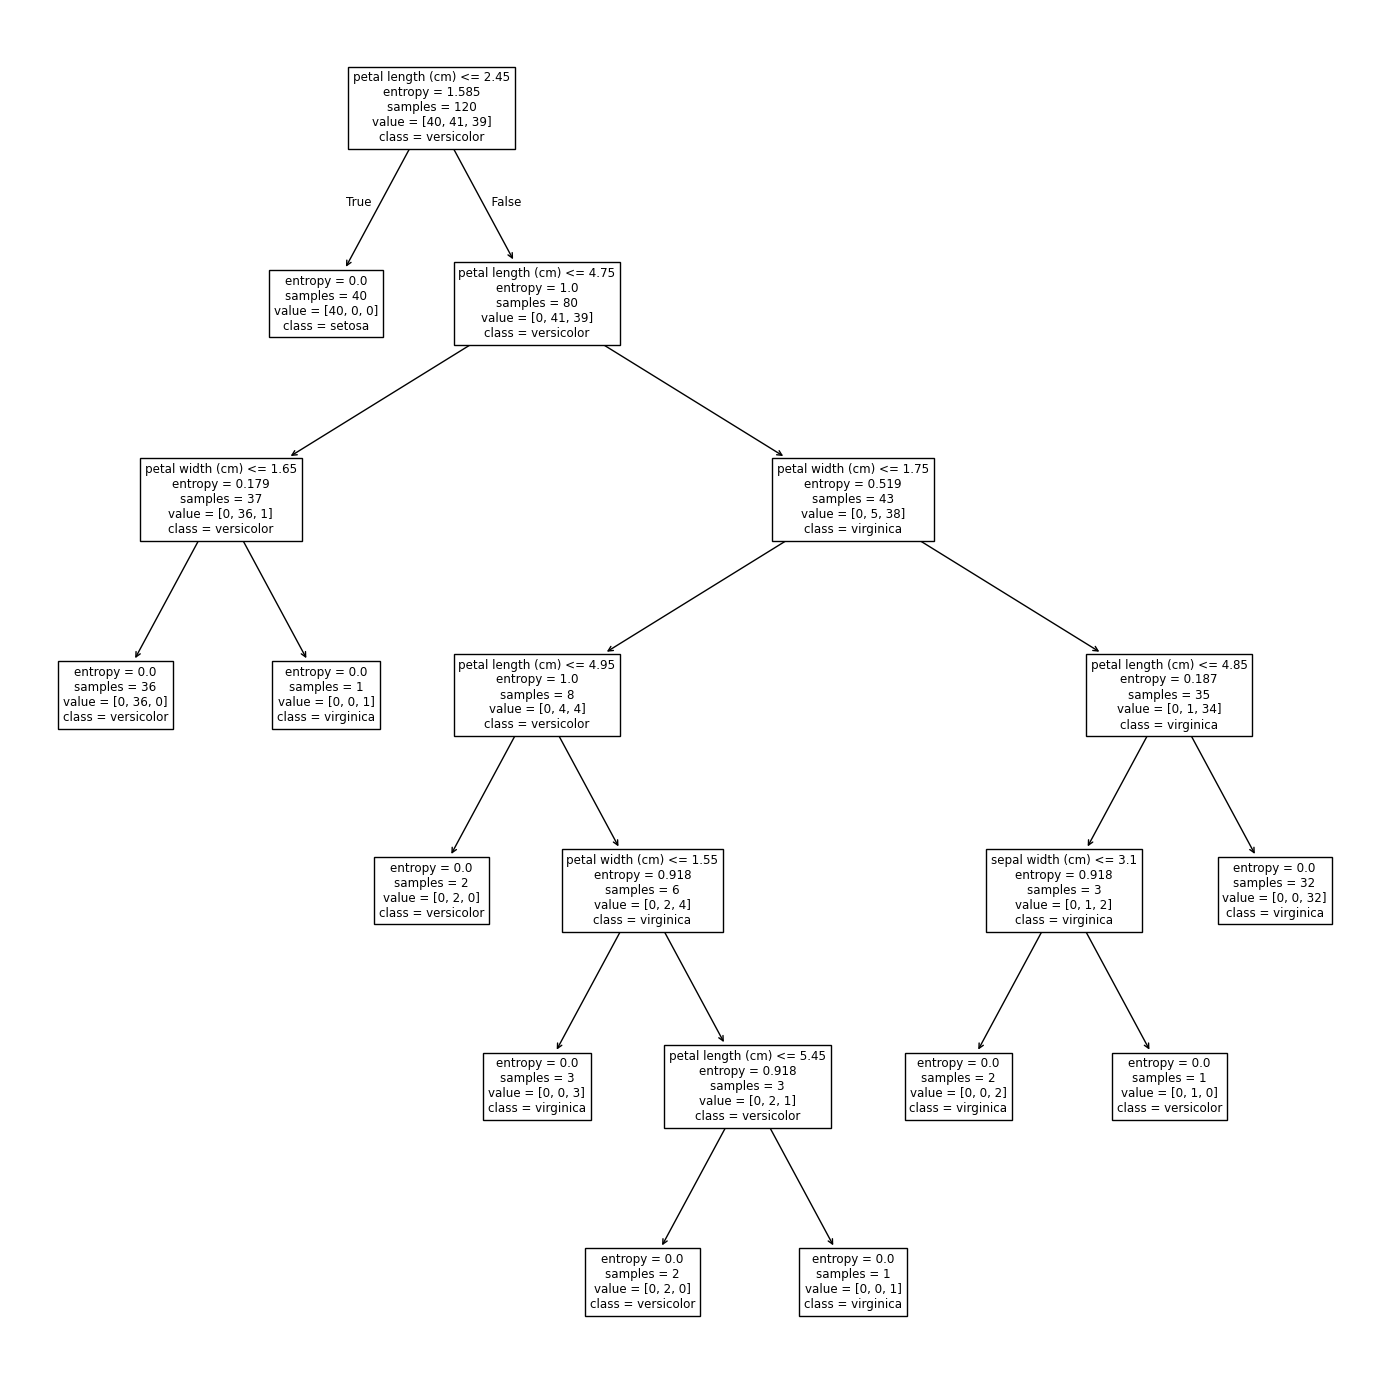

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

hyperparameters = {
            'criterion': 'entropy'
            }

model = DecisionTreeClassifier(random_state=42).set_params(**hyperparameters)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

plt.figure(figsize=(14, 14))
tree.plot_tree(model,
              feature_names=X_train.columns,
              class_names=['setosa', 'versicolor', 'virginica'],
              filled=False)

plt.tight_layout();

The above tree keeps splitting till all the nodes are pure and can lead to overfitting. The next cell introduces some (hyper)parameters that help avoid overfitting.

1.0


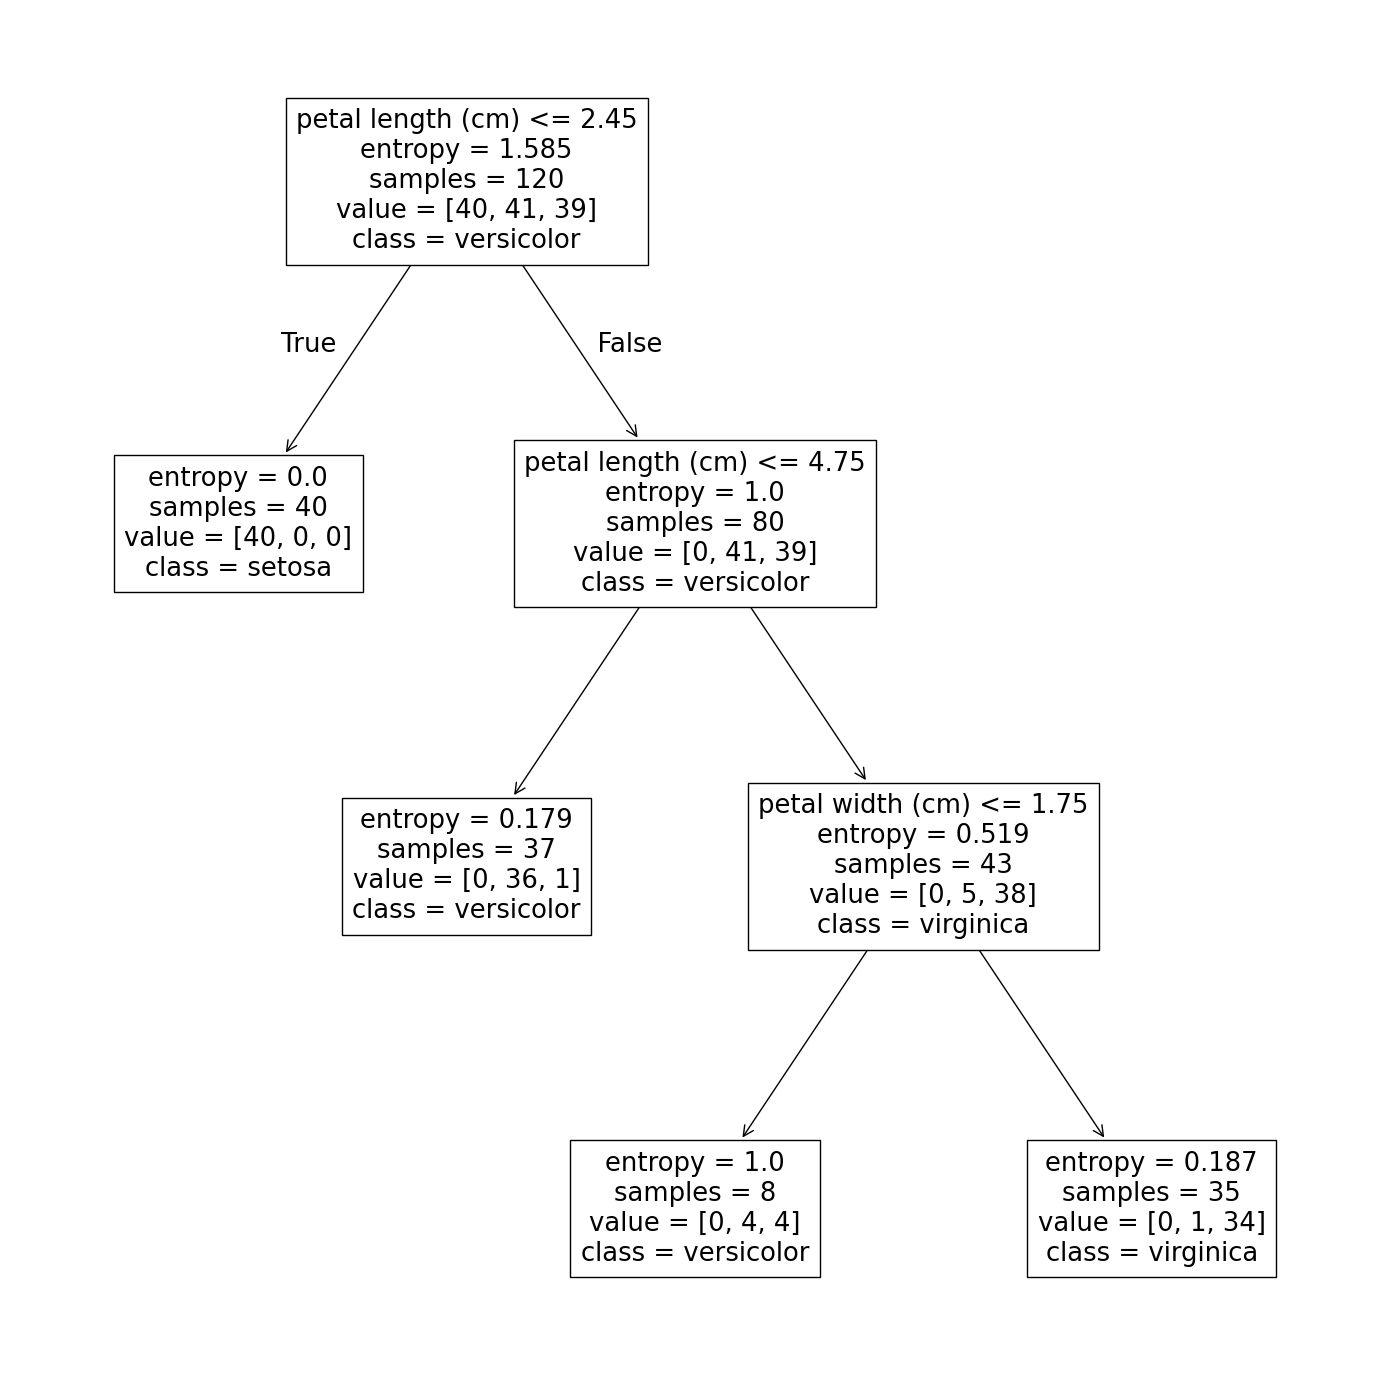

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

hyperparameters = {
            'criterion': 'entropy',
            'max_depth': 3,
            'max_leaf_nodes': 4
            }

model = DecisionTreeClassifier(random_state=42).set_params(**hyperparameters)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

plt.figure(figsize=(14, 14))
tree.plot_tree(model,
              feature_names=X_train.columns,
              class_names=['setosa', 'versicolor', 'virginica'],
              filled=False)

plt.tight_layout();

### Tuning Random Forest (Hyper)Parameters

Please see the following for the full list of (hyper)parameters:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Our choices when we performed Grid Search:

<pre>
hyperparameters = {
            'n_estimators': [50, 200],
            'criterion': ['entropy', 'gini'],
            'max_depth': [3, 4],
            'max_leaf_nodes': [7, 9],
            'bootstrap': [True, False]
            }
</pre>   

We are responsible for fine tuning (optimizing) our algorithm so we are providing a list of values, hyperparameters, we want to try out in order to find the optimal settings.

### max_depth

Number of levels in our tree. Our default iris levels are

### max_leaf_nodes

Max leaves

### bootstrap

Bootstrapping is any test or metric that uses random sampling with replacement (e.g. mimicking the sampling process), and falls under the broader class of resampling methods. Bootstrapping assigns measures of accuracy (bias, variance, confidence intervals, prediction error, etc.) to sample estimates. This technique allows estimation of the sampling distribution of almost any statistic using random sampling methods.

https://en.wikipedia.org/wiki/Bootstrapping_(statistics)

Random forests create many decision trees that sample data. The bootstrap hyperparameter sets sampling with or without replacement.

**Rule**: Never make adjustments to your model based on test set results.
            

### Grid Search

See Grid Search Notebook

### Cross Validation

See Cross Validation Notebook

* K-fold vs Group K-fold

https://towardsdatascience.com/why-you-should-never-use-cross-validation-4360d42456ac

### Our Final Random Forest Model with Grid Search

In [ ]:
# create dataframe from sklearn iris dataset; print shape, info, and head
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(data=X, columns=iris.feature_names)
df['species'] = y
print(df.shape)
print(df.info())
df.head()

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# train test split using 25% for test size; print X_train shape and head
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('species', axis=1),
                                                    df['species'],
                                                    test_size=0.25,
                                                    random_state=42)

print(X_train.shape)
print(X_train.head())

(112, 4)
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
4                  5.0               3.6                1.4               0.2
32                 5.2               4.1                1.5               0.1
142                5.8               2.7                5.1               1.9
85                 6.0               3.4                4.5               1.6
86                 6.7               3.1                4.7               1.5


In [ ]:
# implement a grid search using max_depth, min_samples_split, min_samples_leaf, bootstrap, and criterion (entropy and gini)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

hyperparameters = {'max_depth': [2, 3],
              'min_samples_split': [4, 5],
              'min_samples_leaf': [4, 5],
              'bootstrap': [True, False],
              'criterion': ['entropy', 'gini']}

grid_search = GridSearchCV(estimator = RandomForestClassifier(),
                           param_grid = hyperparameters,
                           scoring = 'accuracy',
                           cv = 10)

grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('best accuracy', best_accuracy)
print('best parameters', best_parameters)

best accuracy 0.9371212121212119
best parameters {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 5}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# model = RandomForestClassifier(bootstrap = False,
#                                criterion = 'entropy',
#                                max_depth = 3,
#                                min_samples_leaf = 5,
#                                min_samples_split = 4,
#                                random_state = 42)
model = RandomForestClassifier(random_state = 42).set_params(**best_parameters) # * args, ** kwargs
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

1.0


### Hyperparameter Explanations

#### **1. `max_depth`**
* **What it is:** The maximum number of levels allowed in a tree. It determines the longest path from the root node to any leaf node.
* **Purpose:** Controls the complexity of the model. A larger depth can capture more complex patterns but increases the risk of **overfitting**.
* **Example Values:** `[2, 3]` means the search will test trees restricted to a maximum depth of 2 or 3.

#### **2. `min_samples_split`**
* **What it is:** The minimum number of data samples required in a node *before* that node is considered for splitting.
* **Purpose:** Ensures that splits are not made on very small, unrepresentative subsets of data. A higher value leads to a simpler, less deep tree.
* **Example Values:** `[4, 5]` means a node must contain at least 4 or 5 samples to be eligible for a split.

#### **3. `min_samples_leaf`**
* **What it is:** The minimum number of data samples that must be present in a **leaf node** (a terminal node after a split).
* **Purpose:** Controls the smoothness of the decision boundary and helps to reduce **overfitting**. A split is only allowed if it results in both new nodes having at least this many samples.
* **Example Values:** `[4, 5]` means every terminal node must contain at least 4 or 5 samples.

#### **4. `bootstrap`** (Specific to Random Forests)
* **What it is:** A boolean flag that specifies whether **bootstrap samples** (sampling with replacement) are used when building the individual trees in the forest. The fundamental idea of bootstrapping is to create multiple new datasets (called bootstrap samples) from the single original dataset you possess by sampling with replacement.
* **Purpose:** When `True`, each tree is trained on a unique, randomly sampled subset of the training data, which increases the diversity of the trees and reduces **variance** (a core principle of Random Forests). When `False`, the whole dataset is used for every tree.
* **Example Values:** `[True, False]` allows the model to be tested with and without bootstrapping.

#### **5. `criterion`**
* **What it is:** The function used to measure the **quality of a split** (i.e., how impure a node is). The goal of the algorithm is to choose the split that maximally reduces this measure (increases Information Gain).
* **Purpose:** Determines the metric by which the tree evaluates potential splits.
* **Example Values:**
    * **`gini` (Gini Impurity):** Measures the probability of misclassifying a randomly chosen element in the node. It is often faster to compute.
    * **`entropy`:** Measures the disorder or uncertainty in the node using the logarithm (as discussed previously).


### The Bias-Variance Tradeoff

The goal of any machine learning model is to minimize the total prediction error on **unseen data**. This total error can be broken down into three components: **Bias**, **Variance**, and **Irreducible Error** (noise inherent in the data).

* **Bias (Underfitting)**:
    * **Definition**: Error that results from **overly simplistic assumptions** in the learning algorithm. A high-bias model is too simple and consistently misses the true relationship between features and the target variable.
    * **Result**: The model **underfits** the data. It performs poorly on both the training data and new test data.
    * **In Trees**: A very **shallow tree** (e.g., `max_depth` is very low) is a high-bias model. It cannot capture the complexity of the data.

* **Variance (Overfitting)**:
    * **Definition**: Error that results from the model's **excessive sensitivity** to small fluctuations or noise in the training data. A high-variance model essentially **memorizes** the training set, including the noise.
    * **Result**: The model **overfits** the data. It performs extremely well on the training data but poorly on new test data because it fails to generalize.
    * **In Trees**: A very **deep tree** (e.g., no limit on `max_depth`) is a high-variance model. It makes specific decisions based on individual data points (noise).

* **The Tradeoff**: Reducing bias often requires a more complex model (which increases variance), and reducing variance often requires simplifying the model (which increases bias). The goal is to find the "sweet spot" of model complexity that minimizes the total error by balancing these two forces .

#### Hyperparameter Control of the Tradeoff

The hyperparameters are used to tune the **complexity** of a Decision Tree, thereby controlling its position on the bias-variance curve.

#### 1. Complexity (Controlling Depth and Size)

These parameters directly control how deep or wide a single tree is, which is the main factor determining its complexity.

* **`max_depth` (Bias vs. Variance)**:
    * **High Value (Deep Tree)**: **Low Bias** (model is flexible and captures complex patterns) and **High Variance** (risks overfitting to noise).
    * **Low Value (Shallow Tree)**: **High Bias** (model is too simple) and **Low Variance** (generalizes well because it makes fewer, broader mistakes).
* **`min_samples_split` & `min_samples_leaf` (Variance Reduction)**:
    * **High Values**: Increase the constraints on the tree, forcing it to be simpler. This **increases Bias** (the model makes more simplifying assumptions) and **decreases Variance** (less likely to create specific rules for individual data points).

#### 2. Ensemble Methods (Random Forest Specific)

The Random Forest algorithm uses multiple trees to fundamentally address the high variance problem of individual Decision Trees.

* **`bootstrap` (Variance Reduction)**:
    * Setting this to **`True`** (standard for Random Forests) is a technique called **Bagging** (Bootstrap Aggregating). Each tree is trained on a different, slightly varied subset of the data. When the predictions of these many independent, high-variance trees are averaged together, the overall variance of the final model is significantly **reduced** without substantially increasing the bias.
* **`criterion` (Model Consistency)**:
    * Choosing between **`entropy`** and **`gini`** does not primarily affect the bias-variance tradeoff directly, but it affects the *way* splits are chosen. Both aim to increase information gain, leading to purer nodes. Using either tends to produce a model with **low bias** (a decision tree can be flexible) and necessitates the use of other parameters (like `max_depth`) to manage the resulting **high variance**.

Understanding the tradeoff is critical for effective machine learning.

## Feature Selection

* Random Forest Importance: selects features with values are greater than the mean of all the coefficients
* Recursive Feature Selection: removes the weakest feature per iteration and then rebuilds random forest and repeats till criterion is met

In [ ]:
# random forest importance
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

selects = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
selects.fit(X_train, y_train)
selected_feats = X_train.columns[(selects.get_support())]
selected_feats

Index(['petal length (cm)', 'petal width (cm)'], dtype='object')

In [ ]:
# recursive feature elimination
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

selects = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=3)
selects.fit(X_train, y_train)
selected_feats = X_train.columns[(selects.get_support())]
print(selected_feats)
print(selects.estimator_.feature_importances_)
[feat for feat in zip(selected_feats, selects.estimator_.feature_importances_)]

Index(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'], dtype='object')
[0.21239667 0.41717843 0.3704249 ]


[('sepal length (cm)', np.float64(0.21239666916901384)),
 ('petal length (cm)', np.float64(0.417178429625895)),
 ('petal width (cm)', np.float64(0.37042490120509103))]

In [ ]:
# recursive feature elimination with cv
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

selects = RFECV(RandomForestClassifier(n_estimators=100, random_state=42), step=1, cv=5)
selects.fit(X_train, y_train)
selected_feats = X_train.columns[(selects.get_support())]
print(selected_feats)
print(selects.estimator_.feature_importances_)
[feat for feat in zip(selected_feats, selects.estimator_.feature_importances_)]

Index(['petal length (cm)', 'petal width (cm)'], dtype='object')
[0.52289824 0.47710176]


[('petal length (cm)', np.float64(0.5228982388747538)),
 ('petal width (cm)', np.float64(0.47710176112524627))]

https://book.akij.net/eBooks/2018/May/5aef50939a868/Data_Science_for_Bus.pdf

## The Penquin

We started off using a single tree, then a Random Forest, and now it's time to explore advanced boosted tree methods: XGBoost and CatBoost.

### Explain the difference between **bagging** and **boosting** here:

In [ ]:
# create dataframe from sklearn penquins dataset; print shape, info, and head
import seaborn as sns

df = sns.load_dataset("penguins")
print(df.shape)
print(df.info())
df.head()

(344, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### Explain / Document any Pre-Processing Implemented

In [ ]:
# train test split using 25% for test size; print X_train shape and head


### Your Task: Build a Small, Thoughtful Parameter Grid

For each model (RandomForest, XGBoost, CatBoost):

1. Pick **2–3 hyperparameters** you want to tune.
2. Provide **2–3 reasonable values** for each hyperparameter.
3. Justify your choices in a few sentences.
4. Keep your total search size under **10 configurations**.
5. If you use an AI assistant, include the constraints in your prompt (Use AI *as a consultant*, not an autopilot):
   *“Suggest a very small parameter grid (under 10 total combinations) with only 2–3 hyperparameters and 2 choices per hyperparameter.”*

This helps you practice:

* thinking through model behavior,
* designing your own search space,
* using AI responsibly,
* and preventing unnecessarily long grid searches.

In [ ]:
# implement a grid search using appropriate parameter choices

In [ ]:
# create and evaluate a Random Forest model with the best parameters from your Grid Search

In [ ]:
# create and evaluate an XGBoost model with the best parameters from your Grid Search

In [ ]:
# create and evaluate a CatBoost model with the best parameters from your Grid Search

### Explain the difference between **Random Forests**, **XGBoost**, and **CatBoost** here:

Answer these questions (do not delete the questions):
* “Which model performed best on the test set? By how much?”
* “Did boosting (XGBoost/CatBoost) noticeably outperform the bagging method (Random Forest) here?”
* “How many features did your best model effectively use? Look at feature importances.”

### With or Without Island

Should you include island as a predictor?
Explain your reasoning. Consider:

* Is it biologically meaningful?
* Does it duplicate species information?
* Could it help or hurt generalization?
* How would RandomForest / XGBoost / CatBoost handle it differently?

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Load and clean
df = sns.load_dataset("penguins").dropna()

y = df["species"]

numeric_features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
all_features = numeric_features + ["island"]

X = df[all_features]

# Single split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Views of the same split
X_train_num = X_train[numeric_features]
X_test_num = X_test[numeric_features]

X_train_all = X_train[all_features]
X_test_all = X_test[all_features]

# 1) Model using numeric features only
rf_num = RandomForestClassifier(n_estimators=100, random_state=42)

pipe_num = Pipeline(steps=[
    ("model", rf_num)
])

pipe_num.fit(X_train_num, y_train)
y_pred_num = pipe_num.predict(X_test_num)
acc_num = accuracy_score(y_test, y_pred_num)
print(f"Test accuracy (numeric only): {acc_num:.3f}")

# 2) Model using numeric + island (one-hot encode island)
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), ["island"]),
        ("num", "passthrough", numeric_features),
    ]
)

rf_all = RandomForestClassifier(n_estimators=100, random_state=42)

pipe_all = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", rf_all)
])

pipe_all.fit(X_train_all, y_train)
y_pred_all = pipe_all.predict(X_test_all)
acc_all = accuracy_score(y_test, y_pred_all)
print(f"Test accuracy (numeric + island): {acc_all:.3f}")


Test accuracy (numeric only): 0.976
Test accuracy (numeric + island): 1.000


**Why this is good for your learning**

1. **Numeric-only model (≈97% accuracy)**
   You can see what classification looks like using only the physical measurements of the penguins.
   It performs well, but it still makes a few mistakes—especially between Adelie and Chinstrap, which can overlap in size and shape.

2. **Numeric + island model (100% accuracy)**
   When you add island information, you’re now incorporating ecological context.
   This dramatically improves performance, because some species are closely tied to specific islands.
   The model is not overfitting here—the data really is more separable once you include habitat.

3. **What you get to reason about**

   * Should you include `island` if you're building a model for real-world ecological prediction?
   * What happens if you deploy the model on penguins from new islands?
   * Is 100% accuracy always a good sign?
   * How does island interact with the numeric features?

   These questions help you practice thinking through model design and feature selection.

4. **A key machine learning insight**
   You get to see firsthand that **feature choice and domain knowledge** often matter more than the specific algorithm you pick.